In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Read data

In [4]:
df = pd.read_csv("../data/heart.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


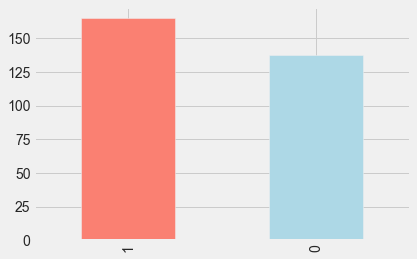

In [7]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
# Датасает выглядит сбалансированным относительно таргета, без пропусков в данных (всегда бы так)

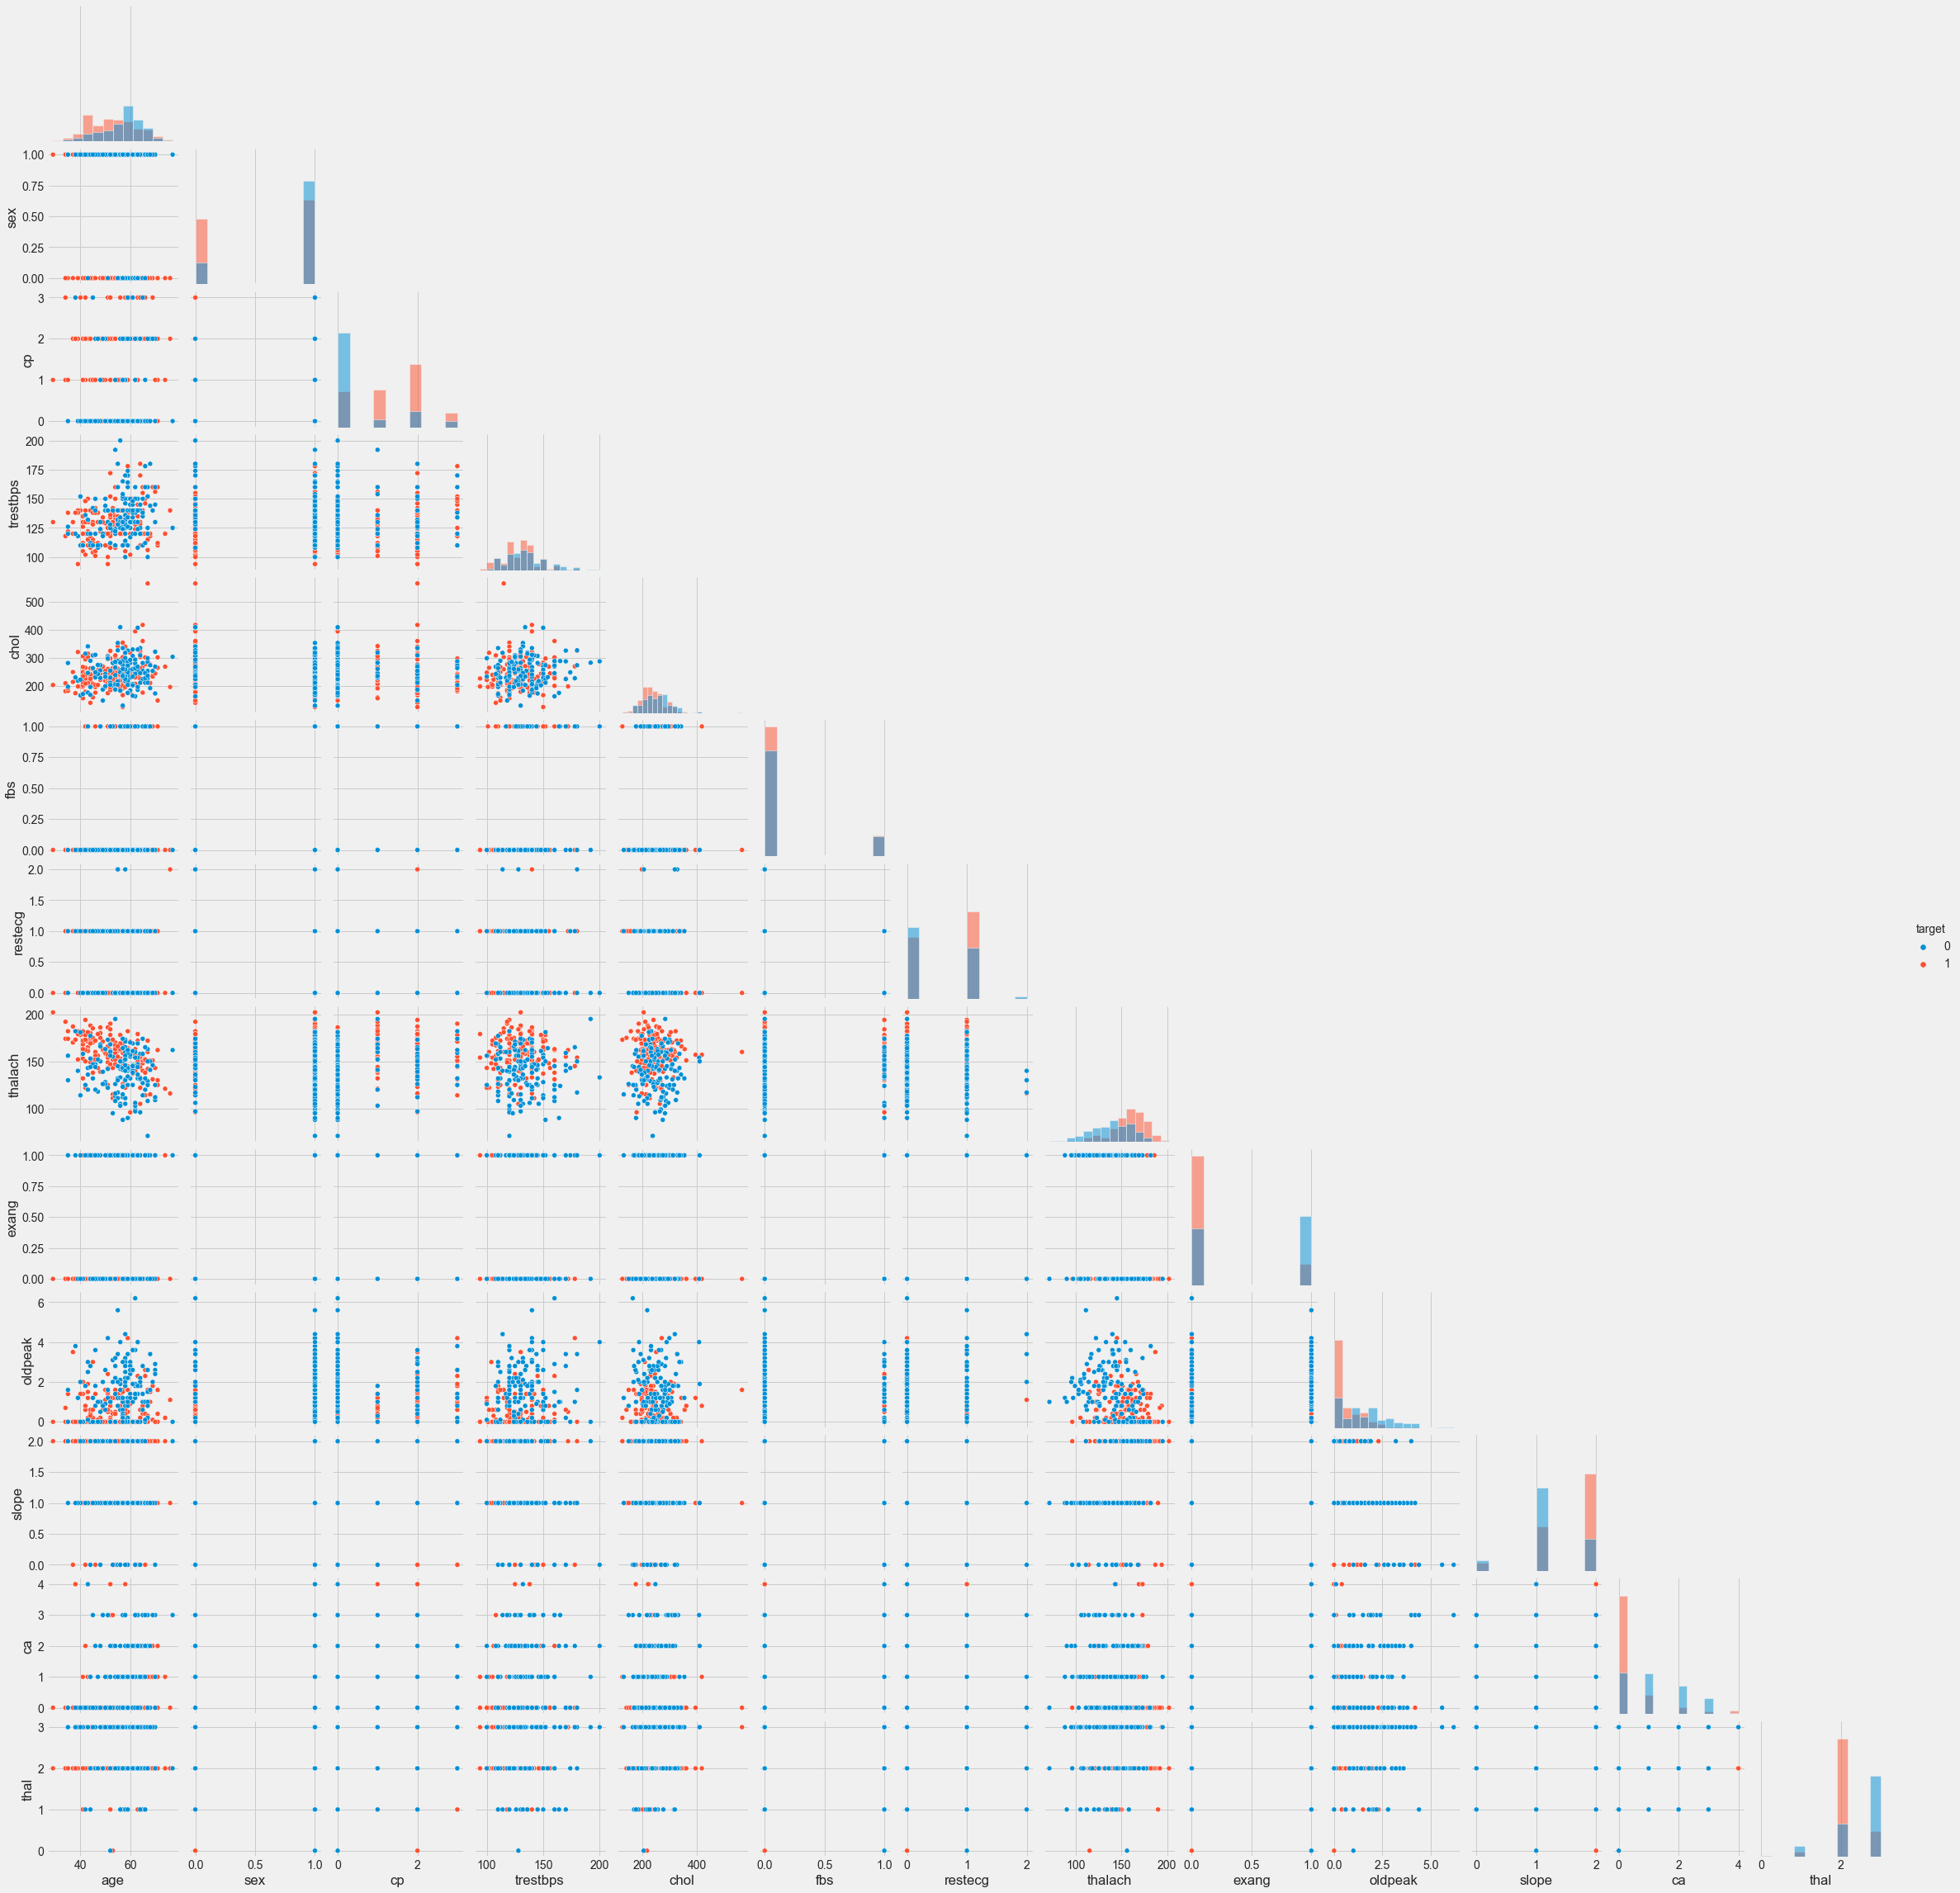

In [14]:
sns.pairplot(df, hue="target", diag_kind="hist", corner=True);

**Факторы, повышыющие риски заболевания:**
- наличие болей в груди (cp)
- аномальное ЭКГ в покое (restecg)
- ангина, вызванная нагрузками (exang)
- повышенный наклон ST сегмента на ЭКГ под нагрузкой (slope)
- малое кол-во крупных сосудов (ca)
- подавление сегмента ST под нагрузкой (oldpeak)
- высокое значение максимальной ЧСС (thalach)

Нельзя однозначно сказать, насколько выборка отражает генеральную совокупность по полу и возрасту, так как здесь зависимости контринтуитивны:
- мужчины чаще страдают от ССС, в датасете наоборот
- люди в возрасте чаще страдают ССС, в датасете также наоборот

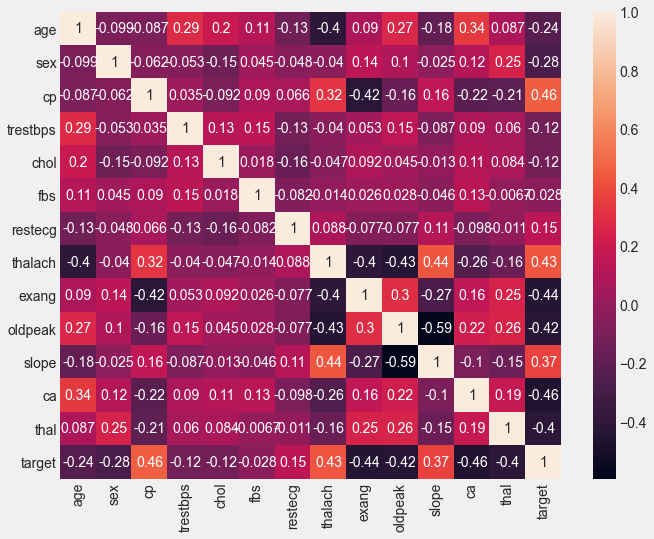

In [18]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr('spearman'), annot=True);

Признаки в основном скоррелированы слабо, тем не менее с таргетом значимо коррелируют:
- cp, thalach, slope - прямая корреляция
- exang, oldpeak, ca, thal - обратная корреляция